<a href="https://colab.research.google.com/github/aravpatel19/Facial-Detection-System/blob/main/FacialEmotionDetection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Imports the required libraries
import cv2
import dlib
import math
import gdown
import unittest
import numpy as np
import urllib.request

from scipy.spatial import distance
from matplotlib import pyplot as plt

###Getting the Dlib Shape predictor!
!wget -O ./shape_predictor_68_face_landmarks.dat https://www.dropbox.com/s/ch5euco240mvjgq/shape_predictor_68_face_landmarks.dat?dl=1
dlibshape_path ='./shape_predictor_68_face_landmarks.dat'

print ("Done")

--2023-11-07 23:52:10--  https://www.dropbox.com/s/ch5euco240mvjgq/shape_predictor_68_face_landmarks.dat?dl=1
Resolving www.dropbox.com (www.dropbox.com)... 162.125.4.18, 2620:100:601c:18::a27d:612
Connecting to www.dropbox.com (www.dropbox.com)|162.125.4.18|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: /s/dl/ch5euco240mvjgq/shape_predictor_68_face_landmarks.dat [following]
--2023-11-07 23:52:10--  https://www.dropbox.com/s/dl/ch5euco240mvjgq/shape_predictor_68_face_landmarks.dat
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://uc718410c76dd03af3dc0a13142b.dl.dropboxusercontent.com/cd/0/get/CHHbqdocY6RtDng8aTfI5I741c16gnzOz4-A5jPhxkF8H3yStJMemIt4zq5So8xTROS8r6lgtFU6tL-xvCznGMpcaZCaT_TCnui3hKEoGNHSR51SkX5SrnYIMOjeDYJRGy2hJAUvlu6w2y9fBscqpslK/file?dl=1# [following]
--2023-11-07 23:52:11--  https://uc718410c76dd03af3dc0a13142b.dl.dropboxusercontent.com/cd/0/get/CHHbqdocY6RtDng8aTfI5I741

In [2]:
#More imports if previous imports don't work
import cv2
import dlib
import gdown
import pickle
import warnings
import numpy as np
import pandas as pd
import seaborn as sns
import urllib.request
from sklearn import metrics
from scipy.spatial import distance
from matplotlib import pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
import io
# ?pip install --upgrade google-api-python-client google-auth-httplib2 google-auth-oauthlib
# warnings.filterwarnings("ignore")
###Getting the csv data loaded
# dataset_url = 'https://drive.google.com/file/d/1MIMk2o63Ri2bDz0CxGK_uUSnc3XPd4Dm'
# dataset_path = './ferdata.csv'
# gdown.download(dataset_url, dataset_path, False)
%pip install googledrivedownloader
# from google_drive_downloader import GoogleDriveDownloader as gdd
# gdd.download_file_from_google_drive(file_id='1hNLedQCRl8uutOwtXWxBmiW3x7bckj4u',
#                                     dest_path='./ferdata.csv', overwrite=True,showsize=True)
#Getting the csv data loaded
dataset_url = 'https://drive.google.com/uc?id=1hNLedQCRl8uutOwtXWxBmiW3x7bckj4u'
dataset_path = './ferdata.csv'
gdown.download(dataset_url, dataset_path, True)
###Getting the Dlib Shape predictor!
dlibshape_url = 'https://drive.google.com/uc?id=1FDLHRfjs9hH1zhknOmIuebSsG6djb3yg'
dlibshape_path ='./shape_predictor_68_face_landmarks.dat'
gdown.download(dlibshape_url, dlibshape_path, True)
###Getting the Xpure loaded
pureX_url = 'https://drive.google.com/uc?id=1tc203qSeCwyayyFV7HHrNaMAdT__WoP5'
pureX_path = './pureX.npy'
gdown.download(pureX_url, pureX_path,True)
###Getting the Xdata loaded
dataX_url = 'https://drive.google.com/uc?id=1pQuzapUKRSXDNZqXuUUdJfO1L-AFuefY'
dataX_path = './dataX.npy'
gdown.download(dataX_url, dataX_path, True)
###Getting the Ydata loaded
dataY_url = 'https://drive.google.com/uc?id=1figaVbzcmrz8JumBs-1Ql20mbVIh_d0x'
dataY_path = './dataY.npy'
gdown.download(dataY_url, dataY_path, True)
print ("Data Downloaded!")

Access denied with the following error:



 	Cannot retrieve the public link of the file. You may need to change
	the permission to 'Anyone with the link', or have had many accesses. 

You may still be able to access the file from the browser:

	 https://drive.google.com/uc?id=1hNLedQCRl8uutOwtXWxBmiW3x7bckj4u 



Access denied with the following error:



 	Cannot retrieve the public link of the file. You may need to change
	the permission to 'Anyone with the link', or have had many accesses. 

You may still be able to access the file from the browser:

	 https://drive.google.com/uc?id=1FDLHRfjs9hH1zhknOmIuebSsG6djb3yg 



Access denied with the following error:



 	Cannot retrieve the public link of the file. You may need to change
	the permission to 'Anyone with the link', or have had many accesses. 

You may still be able to access the file from the browser:

	 https://drive.google.com/uc?id=1tc203qSeCwyayyFV7HHrNaMAdT__WoP5 



Access denied with the following error:



 	Cannot retrieve the public link of the file. You may need to change
	the permission to 'Anyone with the link', or have had many accesses. 

You may still be able to access the file from the browser:

	 https://drive.google.com/uc?id=1pQuzapUKRSXDNZqXuUUdJfO1L-AFuefY 



Access denied with the following error:
Data Downloaded!



 	Cannot retrieve the public link of the file. You may need to change
	the permission to 'Anyone with the link', or have had many accesses. 

You may still be able to access the file from the browser:

	 https://drive.google.com/uc?id=1figaVbzcmrz8JumBs-1Ql20mbVIh_d0x 



# Emotion Detection


![Demo](https://media.gettyimages.com/photos/facial-recognition-of-caucasian-businessman-picture-id905553688?k=6&m=905553688&s=612x612&w=0&h=05pKk6IgZ8SGLOGWdKIkcVz4toQEThSV40TguY5xAh8=)

Core emotions: **Anger, Happy, Sad, Surprise, Neutral**





[different emotions](https://imotions.com/blog/facial-action-coding-system)

##Face Detection Demonstration



###Load Trained Dlib model

In [3]:
# Load's dlib's pretrained face detector model
frontalface_detector = dlib.get_frontal_face_detector()

In [4]:
# Helper Function for Face Detection

'''
  Converts dlib rectangular object to bounding box co-ordinates
'''
def rect_to_bb(rect):
    # take a bounding predicted by dlib and convert it
    # to the format (x, y, w, h)
    x = rect.left()
    y = rect.top()
    w = rect.right() - x
    h = rect.bottom() - y
    return (x, y, w, h)


In [5]:
#Helper Function for Face Detection with a given image

"""
Detects the face in the given image
"""
def detect_face(image_url):
  """
  :type image_url: str
  :rtype: None

  """
  try:

    #Decodes image address to cv2 object
    url_response = urllib.request.urlopen(image_url)
    img_array = np.array(bytearray(url_response.read()), dtype=np.uint8)
    image = cv2.imdecode(img_array, -1)

  except Exception as e:
    return "Please check the URL and try again!"

  #Detect faces using dlib model
  rects = frontalface_detector(image, 1)

  if len(rects) < 1:
    return "No Face Detected"

  # Loop over the face detections
  for (i, rect) in enumerate(rects):
    # Converts dlib rectangular object to bounding box co-ordinates
    (x, y, w, h) = rect_to_bb(rect)
    cv2.rectangle(image, (x, y), (x + w, y + h), (0, 255, 0), 2)

  plt.imshow(image, interpolation='nearest')
  plt.axis('off')
  plt.show()


### Face Detection

Enter the URL of the image: 

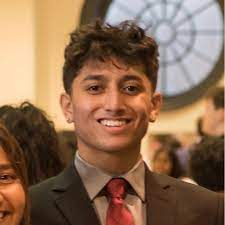

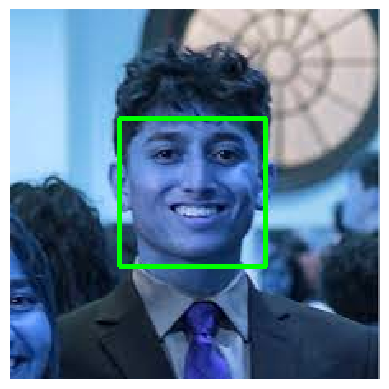

In [7]:
# https://www.clickinmoms.com/blog/wp-content/uploads/2014/10/black-and-white-portrait-of-man-with-his-eyes-closed-by-Brian-Powers.jpg
# https://i.pinimg.com/736x/a8/59/05/a85905aad4b379aafd63bbbd3144025d--freya-mavor-beautiful-people.jpg
# https://i.pinimg.com/236x/27/28/0e/27280ee28567c1e20c119f74981ee5c4--black-freckles-freckles-makeup.jpg

detect_face(input('Enter the URL of the image: '));

##Facial Landmark Demonstration

![](https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcQ3TMlMcOORwi88JUPO3xvHbjl8yBGDZnMMNhfpY5pS4Mvq_n7w)



## Facial Landmark Estimation


In [8]:
# Load's dlib's pretrained face detector model
frontalface_detector = dlib.get_frontal_face_detector()
#Load the 68 face Landmark file
landmark_predictor = dlib.shape_predictor('./shape_predictor_68_face_landmarks.dat')

In [9]:
#Helper function for Face Detection from a url


"""
Returns facial landmarks for the given input image path
"""
def get_landmarks(image_url):
  """
  :type image_url : str
  :rtype image : cv2 object
  :rtype landmarks : list of tuples where each tuple represents
                     the x and y co-ordinates of facial keypoints
  """

  try:

    #Decodes image address to cv2 object
    url_response = urllib.request.urlopen(image_url)
    img_array = np.array(bytearray(url_response.read()), dtype=np.uint8)
    image = cv2.imdecode(img_array, -1)

  except Exception as e:
    print ("Please check the URL and try again!")
    return None,None

  #Detect the Faces within the image
  faces = frontalface_detector(image, 1)
  if len(faces):
    landmarks = [(p.x, p.y) for p in landmark_predictor(image, faces[0]).parts()]
  else:
    return None,None

  return image,landmarks

In [10]:
#Helper function to visualize landmarks

"""
Display image with its Facial Landmarks
"""
def image_landmarks(image,face_landmarks):
  """
  :type image_path : str
  :type face_landmarks : list of tuples where each tuple represents
                     the x and y co-ordinates of facial keypoints
  :rtype : None
  """
  radius = -1
  circle_thickness = 5
  image_copy = image.copy()
  for (x, y) in face_landmarks:
    cv2.circle(image_copy, (x, y), circle_thickness, (255,0,0), radius)

  plt.imshow(image_copy, interpolation='nearest')
  plt.axis('off')
  plt.show()


Enter the URL of the image: 

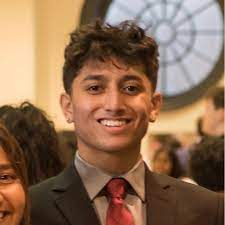

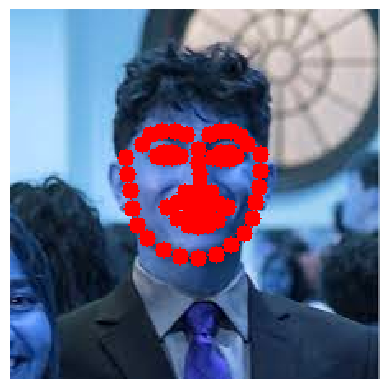

In [11]:
#Extract the Facial Landmark co-ordinates
image,landmarks= get_landmarks(input("Enter the URL of the image: ")) #url

#Plot the Facial Landmarks on the face
if landmarks:
  image_landmarks(image,landmarks)
else:
  print ("No Landmarks Detected")

In [12]:
#Visualize the features we've extracted

def show_indices(landmarks, i_index):

  plt.scatter(x=[landmarks[i][0] for i in range(len(landmarks)//2, len(landmarks))],
              y=[-landmarks[i][1] for i in range(len(landmarks)//2, len(landmarks))], s=50, alpha=.5, color='blue', label='second half of indices')

  plt.scatter(x=[landmarks[i][0] for i in range(len(landmarks)//2)],
              y=[-landmarks[i][1] for i in range(len(landmarks)//2)], color='red', alpha=.5, label='first half of indices')

  # what should X and Y be to visualize the feature at i_index?
  x = landmarks[i_index][0]
  y = -landmarks[i_index][1]
  plt.scatter(x=x, y=y,
             color='purple', s=100, marker='x', label='feature at index %d'%i_index)


  plt.scatter(x, y, color='red', alpha=.5, label='selected indices')

  plt.axis('off');
  plt.legend(bbox_to_anchor=[1,1])
  plt.title('Visualizing the features we\'ve extracted from this image',y =1.2)

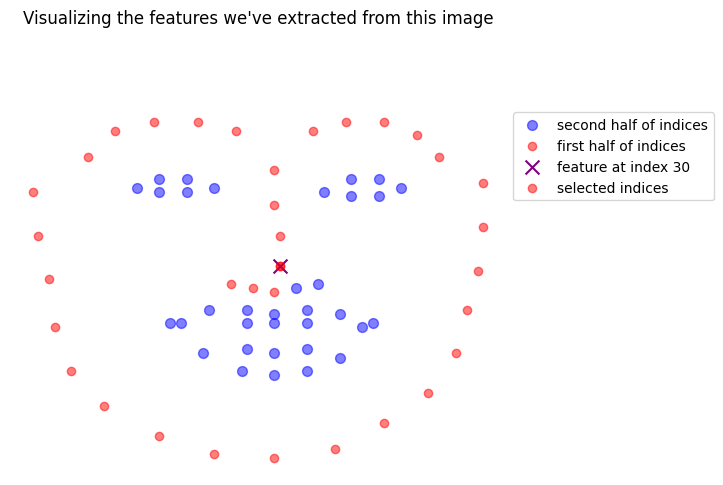

In [13]:
show_index = 30
show_indices(landmarks, show_index)

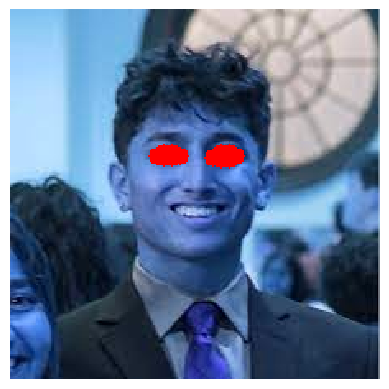

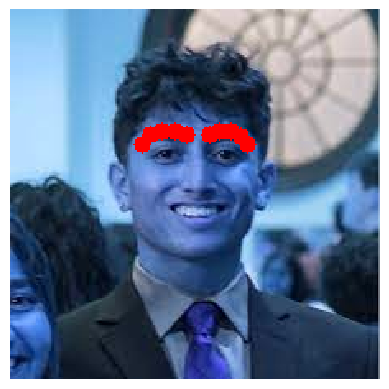

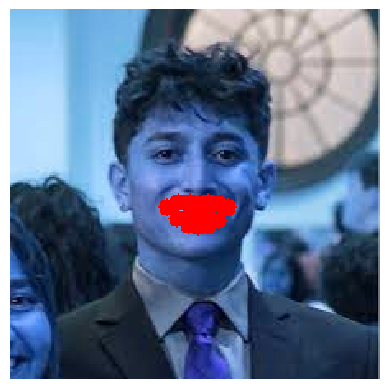

In [14]:
# Display images with individual detection of face parts
eye_points = (36,47)
selected_landmarks = landmarks[eye_points[0]:eye_points[1]+1]
image_landmarks(image,selected_landmarks)

eyebrow_points = (17,26)
selected_landmarks = landmarks[eyebrow_points[0]:eyebrow_points[1]+1]
image_landmarks(image,selected_landmarks)

mouth_points = (48,67)
selected_landmarks = landmarks[mouth_points[0]:mouth_points[1]+1]
image_landmarks(image,selected_landmarks)


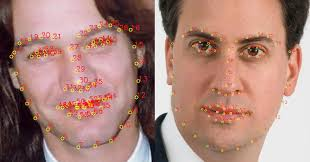

###Euclidean Distance

In [27]:
"""
Computes the euclidean distance between 2 points in 2D space
#inexing#math.sqrt
"""
def euclidean_distance(p1,p2):
  """
  type p1, p2 : tuple
  rtype distance: float
  """
  ### YOUR CODE HERE

  x_1 = p1[0]
  x_2 = p2[0]
  y_1 = p1[1]
  y_2 = p2[1]
  dist_squared = (x_1 - x_2)**2 + (y_1 - y_2)**2
  return math.sqrt(dist_squared)

  ### END CODE

print(euclidean_distance((3, 4), (0, 0)))


5.0


###Psuedo-Algorithm

1. Identity the Facial Landmarks of Interest
2. Compute the distances between the points of interest
3. Compare the distances of both the images


In [30]:
"""
Distinguishes between two images--->closed eyes v/s open eyes
"""
def classify_images(image1_path,image2_path,plt_flag):
  """
  type image1_path,image2_path: str
  type plt_flag: boolean #Displays input images if True
  rtype : str
  """
  image1,image1_landmarks = get_landmarks(image1_path)
  image2,image2_landmarks = get_landmarks(image2_path)

  if plt_flag:
    #Plot image1
    plt.imshow(image1, interpolation='nearest')
    plt.title("Image1")
    plt.show()

    #Plot image2
    plt.imshow(image2, interpolation='nearest')
    plt.title("Image2")
    plt.show()
  ### YOUR CODE HERE
    top1_points = 43
    selected_image1_landmarks = image1_landmarks[top1_points]
    image1_landmarks(image,selected_image1_landmarks)

    top2_points = 43
    selected_image2_landmarks = image2_landmarks[top2_points]
    image2_landmarks(image,selected_image2_landmarks)

    bottom1_points = 47
    selected_bottom1_landmarks = image1_landmarks[bottom1_points]
    image1_landmarks(image,selected_image1_landmarks)

    bottom2_points = 47
    selected_image2_landmarks = image2_landmarks[top2_points]


  print(euclidean_distance(selected_image1_landmarks, selected_image2_landmarks))
  print(euclidean_distance(selected_image1_landmarks, selected_image2_landmarks))

  ### END CODE